# Kenar Çıkarımı

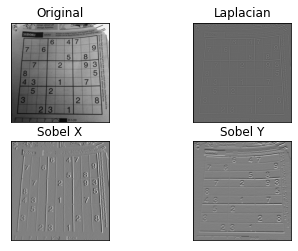

In [1]:
#sobel 
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('images/sudokumall.png',0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
cv2.imshow("lab",sobely)
cv2.waitKey()
cv2.destroyAllWindows()

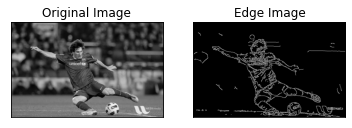

In [1]:
#Canny
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('images/messi5.jpg',0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [4]:
#İmage Piramit
import cv2 as cv
import numpy as np,sys
A = cv.imread('images/apple.jpg')
B = cv.imread('images/orange.jpg')
# generate Gaussian pyramid for A
G = A
gpA = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpA.append(G)
# generate Gaussian pyramid for B
G = B
gpB = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpB.append(G)
# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpA[i])
    L = cv.subtract(gpA[i-1],GE)
    lpA.append(L)
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpB[i])
    L = cv.subtract(gpB[i-1],GE)
    lpB.append(L)
# Now add left and right halves of images in each level
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)
# now reconstruct
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.add(ls_, LS[i])
# image with direct connecting each half
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))
cv.imwrite('images/Pyramid_blending2.jpg',ls_)
cv.imwrite('images/Direct_blending.jpg',real)

True